# Statistics for Data Scientists

Statistics is a very difficult field to get a good foundation in, but having a robust statistical toolbox is crucial for any data scientist. This workshop is intended for students interested in data science, but are from a non-statistical background, and should bolster a general statistical intuition through some of statistics most powerful and popular theories. It will start with a brief bit on theoretical distributions, move on to the central limit theorem, and then end with A/B testing. 

## Theoretical Distributions 
Theoretical statistical distributions all stem from the idea that there are a very small number of ways that data exist in the real world, and once we can roughly segment real world data into these distributions, we can use the properties of these distributions to predict and analyze data. 

In [1]:
from scipy.stats import norm, poisson, bernoulli, binom
import warnings
warnings.filterwarnings('ignore')

#### Normal Distribution
The normal distribution is famous for being the most widely used and seen distribution in natural phenomena. It is a foundational distribution that relies on the fact that the data centers around a mean and deviates equally above and below this mean. It is also commonly referred to as the bell curve. 

In [2]:
norm.rvs(10,1)

8.2636457677716

In [3]:
import seaborn as sns

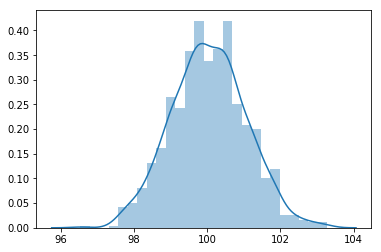

In [4]:
normal_values = norm.rvs(100,1,1000)
sns.distplot(normal_values)

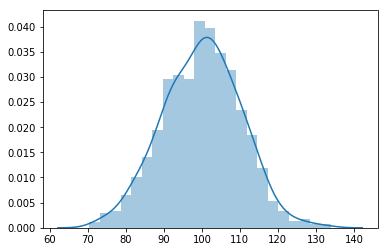

In [5]:
normal_values = norm.rvs(100,10,1000)
sns.distplot(normal_values)

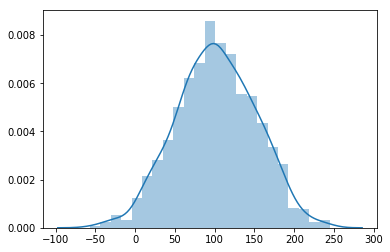

In [6]:
normal_values = norm.rvs(100,50,1000)
sns.distplot(normal_values)

#### Poisson Distribution
A poisson variable measures the number of successful events in a given time.  
Example: average of horse kicks in the prussian army.  
http://blog.minitab.com/blog/quality-data-analysis-and-statistics/no-horsing-around-with-the-poisson-distribution-troops


In [7]:
poisson.rvs(.5, 0, 10)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

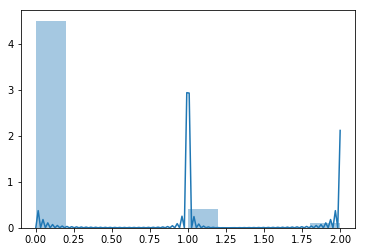

In [8]:
poisson_values = poisson.rvs(.1, 0, 100)
sns.distplot(poisson_values)

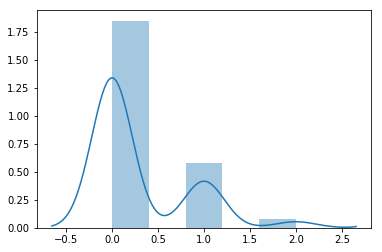

In [9]:
poisson_values = poisson.rvs(.3, 0, 100)
sns.distplot(poisson_values)

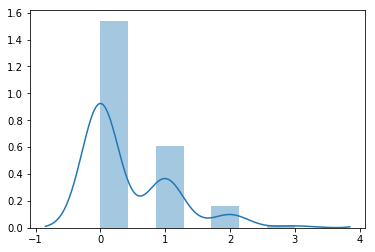

In [10]:
poisson_values = poisson.rvs(.5, 0, 100)
sns.distplot(poisson_values)

#### Bernoulli and Binomial Distributions
The Bernoulli distribution is a special case of the binomial distribution, so we'll start there and move to binomial afterwards.  
Bernoulli distributions represent data that have a probability (p) of having a success (a value of 1) in one try. If p is .5, it is just like flipping a coin!

In [15]:
bernoulli.rvs(p = .1, size = 10)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [16]:
bernoulli.rvs(p = .2, size = 10)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

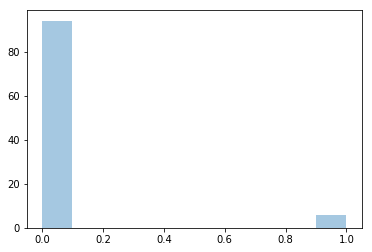

In [18]:
bernoulli_values = bernoulli.rvs(p = .1, size = 100)
sns.distplot(bernoulli_values, kde=False)

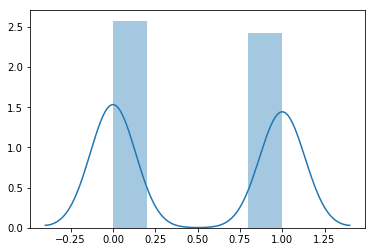

In [14]:
bernoulli_values = bernoulli.rvs(p = .5, size = 1000)
sns.distplot(bernoulli_values)

The Binomial distribution is exactly the same as the Bernoulli, but with n trials 

In [19]:
binom.rvs(n = 10, p = .1)

2

In [20]:
binom.rvs(n = 100, p = .1)

10

In [21]:
binom.rvs(n = 100, p = .1, size = 100)

array([10, 12, 11, 10, 11,  6, 12, 12, 13, 16, 15, 11,  6,  9, 10, 10, 10,
        9, 13, 12,  7,  8,  9,  8, 15, 10,  7,  8,  8, 12,  6, 16, 12, 10,
       14,  9, 11,  9, 17, 12,  9, 15, 12,  9,  6, 14, 12, 13, 13, 14,  6,
       11, 13, 11,  6, 16,  6,  8,  6, 13, 15,  8, 13, 12,  7, 11,  8, 11,
       11,  8,  8,  8,  7,  7, 11,  9,  9,  6, 13, 15, 14,  8,  9,  9, 10,
       12,  8, 11,  7, 13, 13,  7,  9,  7, 10, 10, 11,  7, 11,  9])

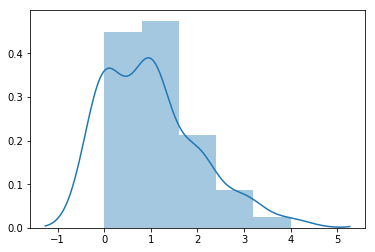

In [22]:
binomial_values = binom.rvs(n = 10, p = .1, size = 100)
sns.distplot(binomial_values)

## Central Limit Theorem

If you randomly sample enough values from a distribution of any shape, the average of the samples will form a normal distribution.

In [432]:
import numpy as np
import pandas as pd

### Dice Rolling

A dice roll is like a sample from a random population, where each roll has an equal chance of landing on each possibility. We can use numpy to get a random integer (or really, psuedorandom).

In [65]:
np.random.randint(1,7)

5

In [70]:
np.random.randint(1,7,2)

array([5, 6])

In [88]:
np.random.randint(1,7,2).mean()

4.5

In [97]:
np.random.randint(1,7,10).mean()

4.5

In [98]:
number_tries = 10000

averages_list = []

for i in range(0, number_tries):
    averages_list.append(np.random.randint(1,7,1000).mean())

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


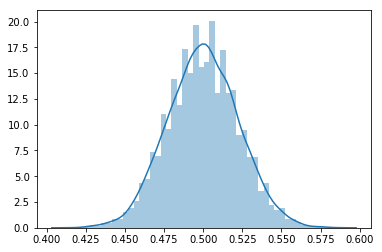

In [431]:
sns.distplot(averages_list)

In [109]:
poisson.rvs(mu = .1, size = 10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
sum(poisson.rvs(mu = .5, loc = 0, size = 1000))

496

In [434]:
# number_tries = 10000

# averages_list = []

# for i in range(0, number_tries):
#     averages_list.append(poisson.rvs(mu = .5, loc = 0, size = 1000).mean())

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


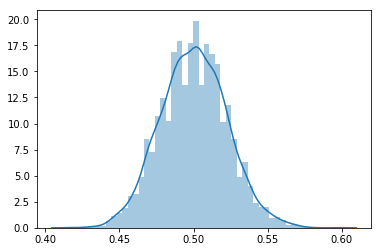

In [435]:
sns.distplot(averages_list)

We now know that the CLT is right. When can we not use CLT?
1. If the sampling is not random.
2. If the values are not independent. In this case, if one die roll was dependent on another die roll, we wouldn't get a normal distribution.

### Who cares if we can find a normal distribution?

In [436]:
normal_dist = norm(np.mean(averages_list), np.std(averages_list))

In [441]:
rand_values = normal_dist.rvs(size=10000)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


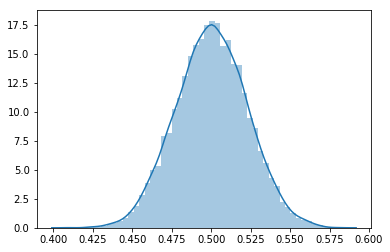

In [439]:
sns.distplot(rand_values)

What is probability that we get an average that is under .55?

In [443]:
normal_dist.cdf(.55)

0.9867780018897176

What about over?

In [445]:
1 - normal_dist.cdf(.55)

0.013221998110282351

## A Quick Intro to A/B testing

If you're interested in a more run through of A/B testing, see the practical data science workshop on our github ( https://github.com/dsiufl/Python-Workshops ). 

One major use of the work above is on A/B testing, a method from causal inference. A/B testing is used to attempt to figure out, given two options, which option should be taken?  
For example, given the two options for a website layout below, how would you test which website was superior?

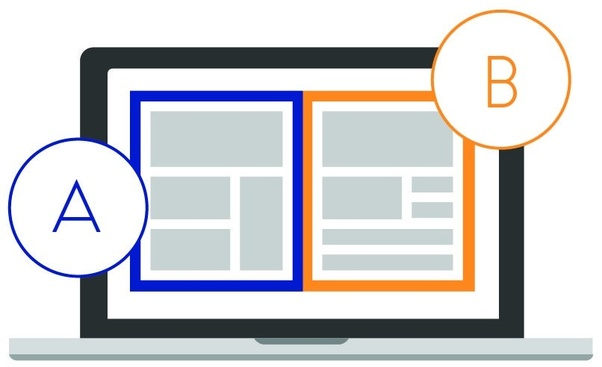

A/B testing has a few steps  
1. Randomly separate the samples into two groups
2. Create null hypothesis
3. Measure some outcome from the two groups (in this case, how long the user stayed on the page)
4. Perform t-test on populations to see if the populations differ  

In our case, we'll generate our data to see how to interpret an A/B test, post randomization.  
  
Our null hypothesis is a way of saying 'let's wait to believe anything until we have evidence to.' In this case, we assume that the layouts are exactly the same, and people spend the same amount of time on each.  
Now let's generate random data for the two layouts

In [460]:
first_layout = norm.rvs(10, 2, 50)

first_layout

array([12.23347498, 10.36800547,  9.57034638,  8.20135852, 13.04289206,
       15.20748513,  8.35523538, 11.22981613, 12.59211096,  8.20347638,
       11.75258459, 10.78300443, 10.81418547, 11.91596725,  9.71386416,
       10.72555159, 10.55401787, 13.39970346,  7.55420579,  8.84304515,
       10.59916531, 11.30924754,  5.22809195, 11.22837238, 10.93294936,
        6.35319583, 12.03887745, 12.49634652,  6.83008068,  8.2184563 ,
        9.32260735,  9.44150838,  8.51840943,  7.10076397, 10.00174547,
        9.33918807, 12.23417701,  8.56045898,  9.40831675, 10.5543586 ,
       11.49427809, 10.8760216 , 10.30028959,  6.92940524, 12.3320314 ,
        8.67896021, 10.30809515, 12.54281311, 12.30984222, 12.26808388])

In [463]:
second_layout = norm.rvs(12, 2, 50)
second_layout

array([14.42506249, 13.21231896, 13.6379377 ,  8.82450528, 11.68758156,
        9.24061246, 10.50629613, 15.22035014, 11.39960474, 12.59805562,
       14.13220279, 12.61341409, 12.73018881, 14.82182483, 11.27069732,
       18.20569906, 13.77814709, 14.48991971, 13.77833301, 12.60563332,
       12.61688984, 13.6629993 ,  9.84655374, 12.17897447, 11.05979888,
       10.7229218 ,  9.95483207,  9.65707978, 11.04726677, 10.66785396,
       14.34588951, 16.00042441, 12.08692055, 14.39515842,  9.4943092 ,
       12.5916522 , 12.96066859, 16.82429986, 13.9182367 , 13.56793843,
       11.50091075, 11.79450241,  9.93105676, 12.61977473, 12.72598859,
       14.17575816,  9.07684208, 10.97193089,  7.29408929, 14.60534572])

After we generate these data, we can run a t test, which gives us a p value. A p value is a measure of strength against the null hypothesis, and measures the chance that you would find a result as extreme or more extreme than the one we found if the null hypothesis was true. A small p value means that we have more evidence to reject the null hypothesis, and a large p value means we have more evidence to accept the null hypothesis. 

In [467]:
from scipy.stats import ttest_ind
ttest_ind(first_layout, second_layout)

Ttest_indResult(statistic=-5.145931169941993, pvalue=1.369540032130475e-06)

In [470]:
first_layout = norm.rvs(10, 2, 10)
second_layout = norm.rvs(12, 10, 10)
ttest_ind(first_layout, second_layout)

Ttest_indResult(statistic=-1.1328202167209163, pvalue=0.27215438643783435)